         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94
Mean Squared Error: 58891381.95498933
R-squared: 0.9272759219707385


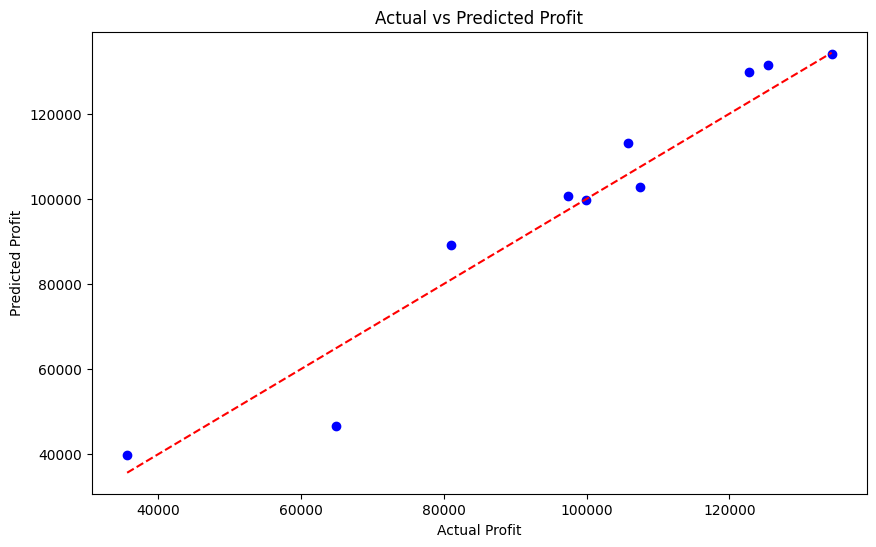

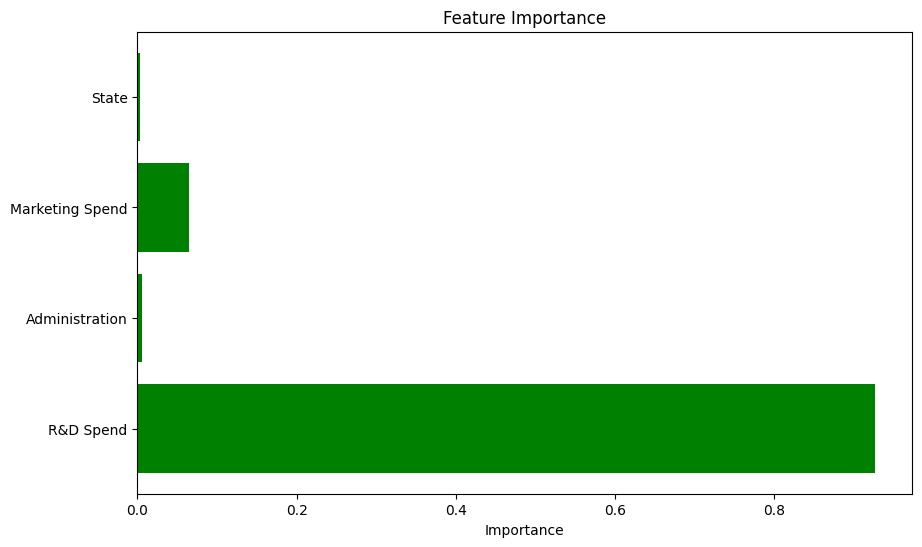

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators

c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
96 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Ashutosh\Downloads\Wakad Thu Fri 6 8\repository\venv\Lib\

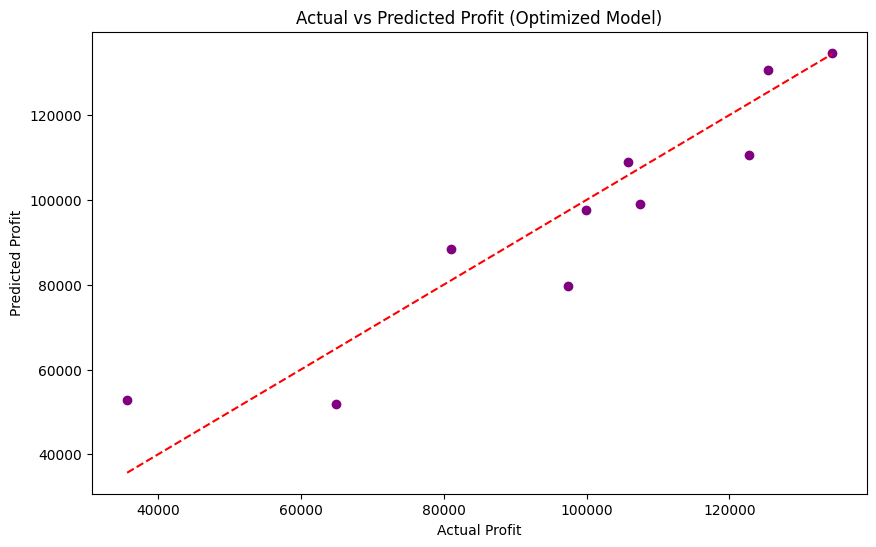

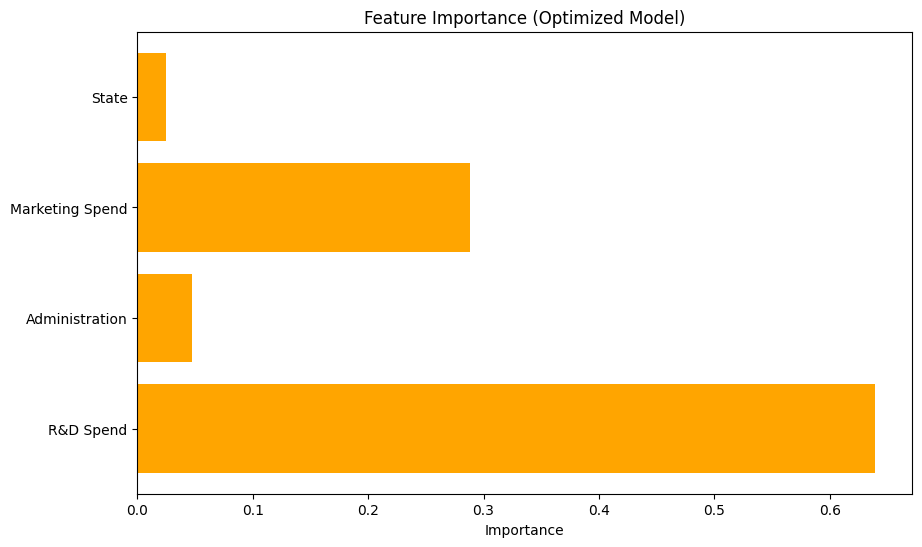

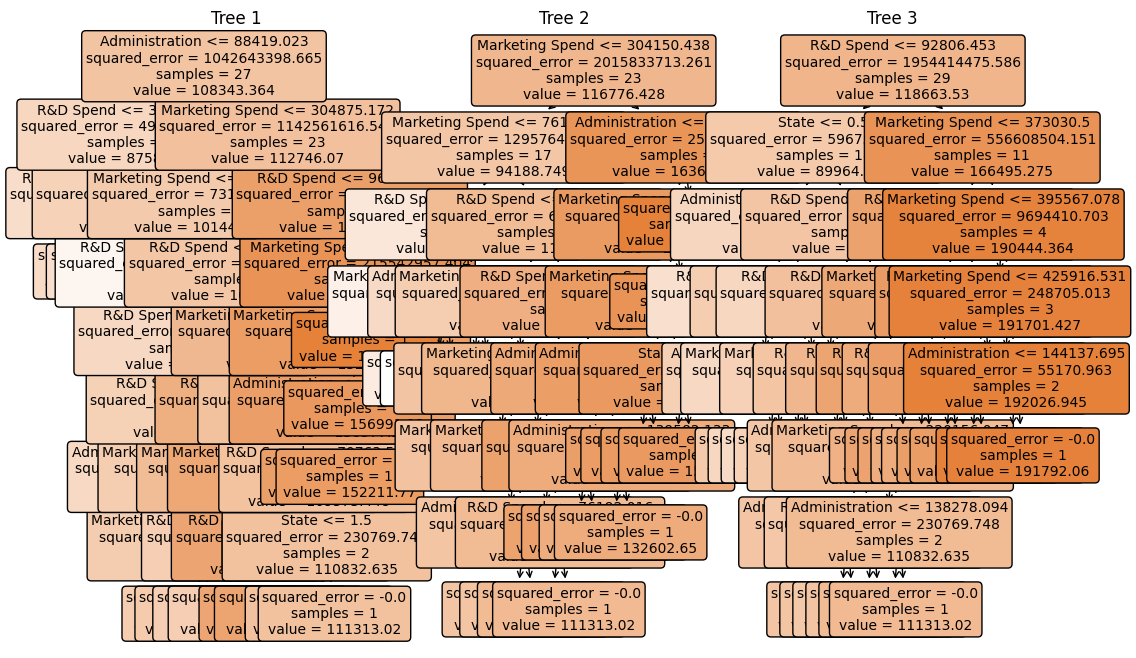

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical data (State column)
labelencoder = LabelEncoder()
df['STATE'] = labelencoder.fit_transform(df['STATE'])

# Define features (X) and target (y)
X = df.drop('PROFIT', axis=1).values  # Features: R&D Spend, Administration, Marketing Spend, State
y = df['PROFIT'].values  # Target: Profit

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model with 100 trees
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Feature Importance
importances = regressor.feature_importances_
features = ['R&D Spend', 'Administration', 'Marketing Spend', 'State']

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(features, importances, color='green')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# Hyperparameter Tuning (Optional - to improve model performance)
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized search to find the best parameters
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters found by Randomized Search
print(f"Best Parameters: {random_search.best_params_}")

# Use the best estimator from the search
best_regressor = random_search.best_estimator_

# Predict using the best model
y_pred_best = best_regressor.predict(X_test)

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Mean Squared Error: {mse_best}')
print(f'Optimized R-squared: {r2_best}')

# Visualize the decision of the optimized model (optional)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit (Optimized Model)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Feature Importance of the Best Model
importances_best = best_regressor.feature_importances_

# Plot feature importance of the optimized model
plt.figure(figsize=(10,6))
plt.barh(features, importances_best, color='orange')
plt.title('Feature Importance (Optimized Model)')
plt.xlabel('Importance')
plt.show()

# If you want to visualize the Random Forest trees (optional)
from sklearn.tree import plot_tree
n_trees_to_plot = 3
plt.figure(figsize=(12,8))
for i in range(n_trees_to_plot):
    plt.subplot(1, n_trees_to_plot, i + 1)
    plot_tree(best_regressor.estimators_[i], filled=True, feature_names=features, rounded=True, fontsize=10)
    plt.title(f'Tree {i + 1}')
plt.show()
